## Excercise 10.13, Page 499 {-}

#### A.

In this section, we will develop a program to perform the Diffusion-Limited Aggregation (DLA) process on a 101x101 lattice.  
We start with a single particle at the center of the grid and allow it to perform a random walk.  
The particle continues to move until it either reaches the edge of the grid or attaches itself to another anchored particle. 

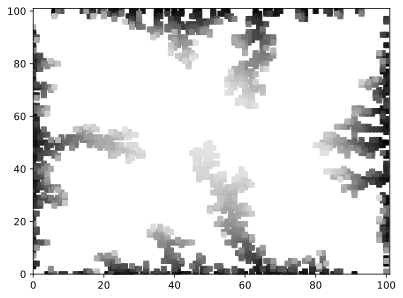

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
%config InlineBackend.figure_formats = ['svg']


# Globals

# Grid size
GRID_SIZE = 101
# Time constant for color
TIME_CONSTANT = GRID_SIZE * GRID_SIZE // 6

# Initial particle position at the center
INITIAL_POS = GRID_SIZE // 2, GRID_SIZE // 2
# Grid to track anchored particles
grid = np.zeros((GRID_SIZE, GRID_SIZE), bool)

def add_particle(x, y, time=0):
    """
    Adds a particle to the grid at position (x, y) and updates the plot.
    The color of the particle is determined based on the time it was added.
    """
    grid[x, y] = True
    color = time / TIME_CONSTANT  #Color based on time
    color = max(0, min(1, color))  # Ensure color is within [0, 1]
    ax.plot(x, y, 's', color=str(color), markersize=5)

def random_walk():
    """
    Performs the random walk for a particle starting at the center of the grid.
    The particle moves randomly until it sticks to an edge or an anchored particle.
    """
    time = 0
    while not grid[INITIAL_POS]:
        time += 1
        x, y = INITIAL_POS
        while True:
            direction = randint(4)
            if direction == 0:  # move up
                if x == GRID_SIZE - 1 or grid[x + 1, y]:
                    add_particle(x, y, time=time)
                    break
                else:
                    x += 1
            elif direction == 1:  # move down
                if x == 0 or grid[x - 1, y]:
                    add_particle(x, y, time=time)
                    break
                else:
                    x -= 1
            elif direction == 2:  # move right
                if y == GRID_SIZE - 1 or grid[x, y + 1]:
                    add_particle(x, y, time=time)
                    break
                else:
                    y += 1
            elif direction == 3:  # move left
                if y == 0 or grid[x, y - 1]:
                    add_particle(x, y, time=time)
                    break
                else:
                    y -= 1

def main():
    global ax
    # Initialize the plot
    fig, ax = plt.subplots()
    ax.set_xlim(0, GRID_SIZE)
    ax.set_ylim(0, GRID_SIZE)
    
    # Run the random walk simulation
    random_walk()

    plt.show()

if __name__ == "__main__":
    main()


#### B.
In this section, we will modify the DLA process to improve the performance by only displaying anchored particles.   We will also experiment with a larger 201x201 lattice to observe more impressive results.


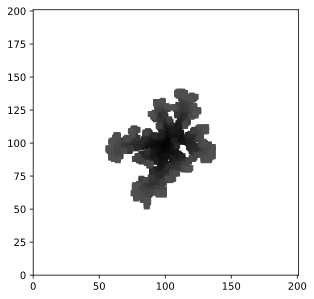

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
%config InlineBackend.figure_formats = ['svg']


#Globals

# Grid size
GRID_SIZE = 201
# Time constant for color
TIME_CONSTANT = GRID_SIZE * GRID_SIZE // 6

# Grid to track anchored particles
grid = np.zeros((GRID_SIZE, GRID_SIZE), bool)

def add_particle(x, y, time=TIME_CONSTANT):
    """
    Adds a particle to the grid at position (x, y) and updates the plot.
    """
    grid[x, y] = True
    color = time / TIME_CONSTANT  # Fixed color for all particles
    ax.plot(x, y, 's', color=str(color), markersize=5)

def generate_random_position(radius=0):
    """
    Generates x, y randomly on the circle with radius r+1.
    """
    theta = 2 * np.pi * np.random.random()
    x = int((radius + 1) * np.cos(theta) + GRID_SIZE // 2)
    y = int((radius + 1) * np.sin(theta) + GRID_SIZE // 2)
    return x, y

def calculate_distance(x, y):
    """
    Calculates the Euclidean distance from the center of the grid to the position (x, y).
    """
    dx = x - GRID_SIZE // 2
    dy = y - GRID_SIZE // 2
    distance = np.sqrt(dx**2 + dy**2)
    return distance

def random_walk_on_circle():
    """
    Performs the random walk for particles starting on the circumference of a circle.
    The particle moves randomly until it sticks to another anchored particle.
    """
    # Initial particle position at the center
    initial_position = GRID_SIZE // 2, GRID_SIZE // 2
    add_particle(*initial_position)

    time = 0
    radius = 1
    while radius * 2 < GRID_SIZE // 2:
        time += 1
        x, y = generate_random_position(radius)
        distance = 0
        while distance <= 2 * radius:
            direction = randint(4)
            new_x, new_y = x, y
            if direction == 0:  # move up
                new_x += 1
            elif direction == 1:  # move down
                new_x -= 1
            elif direction == 2:  # move right
                new_y += 1
            elif direction == 3:  # move left
                new_y -= 1

            if grid[new_x, new_y]:
                add_particle(x, y, time=time)
                if radius < distance:
                    radius = int(distance)
                break
            else:
                x, y = new_x, new_y
            distance = calculate_distance(x, y)

def main():
    """
    Main function to set up the plot and run the optimized diffusion-limited aggregation simulation.
    """
    global ax
    # Initialize the plot
    fig, ax = plt.subplots()
    ax.set_xlim(0, GRID_SIZE)
    ax.set_ylim(0, GRID_SIZE)
    ax.set_aspect('equal')

    # Run the random walk simulation
    random_walk_on_circle()

    # Show the final result
    plt.show()

# Run the main function
if __name__ == "__main__":
    main()


#### C.
In this section, we aim to simulate a more challenging version of the Diffusion-Limited Aggregation (DLA) process.   
The process begins with a single anchored particle at the center of the grid, and new particles are introduced at random points on a circle surrounding the anchored particles.  
These new particles then perform a random walk until they stick to another anchored particle or go out of bounds.   This approach is different from the previous exercises, which had particles start from the center or edges of the grid.

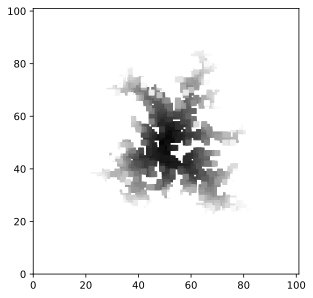

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
%config InlineBackend.figure_formats = ['svg']


# Globals 

# Grid size
GRID_SIZE = 101
# Time constant for color
TIME_CONSTANT = GRID_SIZE * GRID_SIZE // 6

# Grid to track anchored particles
grid = np.zeros((GRID_SIZE, GRID_SIZE), bool)

def add_particle(x, y, time=TIME_CONSTANT):
    """
    Adds a particle to the grid at position (x, y) and updates the plot.
    """
    grid[x, y] = True
    color = min(max(time / TIME_CONSTANT, 0), 1)  # Ensure color is within [0, 1]
    ax.plot(x, y, 's', color=str(color), markersize=5)

def generate_random_position(radius):
    """
    Generates x, y randomly on the circle with radius r+1.
    """
    theta = 2 * np.pi * np.random.random()
    x = int((radius + 1) * np.cos(theta) + GRID_SIZE // 2)
    y = int((radius + 1) * np.sin(theta) + GRID_SIZE // 2)
    return x, y

def calculate_distance(x, y):
    """
    Calculates the distance from the center of the grid to a position (x, y).
    """
    dx = x - GRID_SIZE // 2
    dy = y - GRID_SIZE // 2
    return np.sqrt(dx**2 + dy**2)

def random_walk_on_circle():
    """
    Performs the random walk for particles starting at the edge of a circle
    with an increasing radius until they stick to an anchored particle or an edge.
    """
    global radius
    max_radius = 0
    center = GRID_SIZE // 2, GRID_SIZE // 2
    time = 0

    while max_radius < GRID_SIZE // 2:
        time += 1
        x, y = generate_random_position(radius)
        while True:
            direction = randint(4)
            new_x, new_y = x, y
            if direction == 0:  # move up
                new_x += 1
            elif direction == 1:  # move down
                new_x -= 1
            elif direction == 2:  # move right
                new_y += 1
            elif direction == 3:  # move left
                new_y -= 1

            # Ensure the new position is within the grid boundaries
            if not (0 <= new_x < GRID_SIZE and 0 <= new_y < GRID_SIZE):
                break  # Discard particle if it goes out of bounds

            if calculate_distance(new_x, new_y) > 2 * radius:
                break  # Discard particle if it goes beyond 2r

            if grid[new_x, new_y]:
                add_particle(x, y, time=time)
                current_radius = calculate_distance(x, y)
                if current_radius > max_radius:
                    max_radius = current_radius
                break
            else:
                x, y = new_x, new_y

        radius = int(max_radius)
        if max_radius >= GRID_SIZE // 2:
            break

def main():
    global ax, radius
    radius = 0

    # Initialize the plot
    fig, ax = plt.subplots()
    ax.set_xlim(0, GRID_SIZE)
    ax.set_ylim(0, GRID_SIZE)
    ax.set_aspect('equal')

    # Initial particle position at the center
    initial_position = GRID_SIZE // 2, GRID_SIZE // 2
    add_particle(*initial_position)

    # Run the random walk simulation
    random_walk_on_circle()

    plt.show()

if __name__ == "__main__":
    main()
